<a href="https://colab.research.google.com/github/SuperDuck1892/A.I_HomeWork/blob/main/EX_W5__Temperature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 14.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894086 sha256=055a94b129390ead4afb740d4e0e8b0dd65fe0b1f66092cbdd786f5debce0cfc
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


169.87422580674036


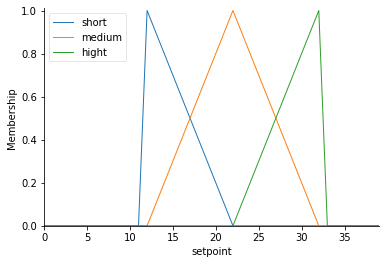

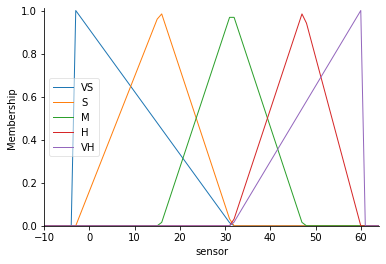

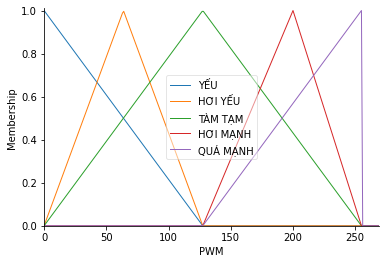

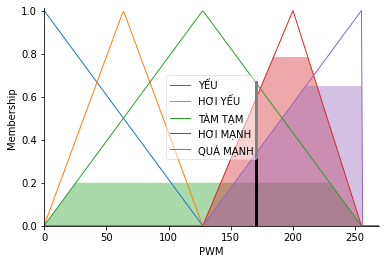

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import  control as ctrl



setpoint = ctrl.Antecedent(np.arange(0,40,1),'setpoint')
sensor = ctrl.Antecedent(np.arange(-10,65,1),'sensor')
PWM = ctrl.Consequent(np.arange(0,270,1),'PWM')


setpoint['short']= fuzz.trimf(setpoint.universe,[12,12,22])
setpoint['medium']= fuzz.trimf(setpoint.universe,[12,22,32])
setpoint['hight']= fuzz.trimf(setpoint.universe,[22,32,32])


setpoint.view()

sensor['VS']= fuzz.trimf(sensor.universe,[-3,-3,31.5])
sensor['S']= fuzz.trimf(sensor.universe,[-3,15.75,31.5])
sensor['M']= fuzz.trimf(sensor.universe,[15.75,31.5,47.25])
sensor['H']= fuzz.trimf(sensor.universe,[31.5,47.25,60])
sensor['VH']= fuzz.trimf(sensor.universe,[31.5,60,60])
sensor.view()



PWM['YẾU']= fuzz.trimf(PWM.universe,[0,0,255/2])
PWM['HƠI YẾU']= fuzz.trimf(PWM.universe,[0,255/4,255/2])
PWM['TÀM TẠM']= fuzz.trimf(PWM.universe,[0,255/2,255])
PWM['HƠI MẠNH']= fuzz.trimf(PWM.universe,[255/2,200,255])
PWM['QUÁ MẠNH']= fuzz.trimf(PWM.universe,[255/2,255,255])


PWM.view()


rule1 = ctrl.Rule(setpoint['short']&sensor['VS'],PWM['YẾU'])
rule2 = ctrl.Rule(setpoint['short']&sensor['S'],PWM['HƠI YẾU'])
rule3 = ctrl.Rule(setpoint['short']&sensor['M'],PWM['HƠI YẾU'])
rule4 = ctrl.Rule(setpoint['short']&sensor['H'],PWM['TÀM TẠM'])
rule5 = ctrl.Rule(setpoint['short']&sensor['VH'],PWM['TÀM TẠM'])

rule6 = ctrl.Rule(setpoint['medium']&sensor['VS'],PWM['HƠI YẾU'])
rule7 = ctrl.Rule(setpoint['medium']&sensor['S'],PWM['TÀM TẠM'])
rule8 = ctrl.Rule(setpoint['medium']&sensor['M'],PWM['HƠI MẠNH'])
rule9 = ctrl.Rule(setpoint['medium']&sensor['H'],PWM['HƠI MẠNH'])
rule10 = ctrl.Rule(setpoint['medium']&sensor['VH'],PWM['QUÁ MẠNH'])

rule11 = ctrl.Rule(setpoint['hight']&sensor['VS'],PWM['TÀM TẠM'])
rule12  = ctrl.Rule(setpoint['hight']&sensor['S'],PWM['HƠI MẠNH'])
rule13 = ctrl.Rule(setpoint['hight']&sensor['M'],PWM['HƠI MẠNH'])
rule14 = ctrl.Rule(setpoint['hight']&sensor['H'],PWM['QUÁ MẠNH'])
rule15 = ctrl.Rule(setpoint['hight']&sensor['VH'],PWM['QUÁ MẠNH'])
PWMing_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15])

PWMing = ctrl.ControlSystemSimulation(PWMing_ctrl)
PWMing.input['setpoint']=20        
PWMing.input['sensor'] = 50       

PWMing.compute()
#xuất ra màn hình
print(PWMing.output['PWM'])
PWM.view(sim = PWMing)